In [3]:
# 3.17 数据分析
import numpy as np
from utils import cal_change_ratio
import matplotlib.pyplot as plt 
datasets = ['chameleon', 'cornell', 'yelp-chi', 'squirrel', 'texas', 'wisconsin']


for dataset_name in datasets:
    y = np.load(f'utils_data/ourModel_{dataset_name}/y.npy')
    edge_label_list = np.load(f'utils_data/ourModel_{dataset_name}/edge_label_list.npy')
    best_val_metric = np.load(f'utils_data/ourModel_{dataset_name}/best_val_metric_list.npy')
    r_r_list = []
    w_r_list = []
    r_w_n_list = []
    w_r_n_list = []
    print(dataset_name)
    for i in range(len(edge_label_list)-1):
        res = cal_change_ratio(y, edge_label_list[i], edge_label_list[i+1])
        r_w_n_list.append(res['r_w_n'])
        w_r_n_list.append(res['w_r_n'])
        print(res)        
    print(best_val_metric)
    edge_label_acc = [np.mean(edge_label==y) for edge_label in edge_label_list]
    print(edge_label_acc)
    
    fig = plt.figure()
    ax = fig.add_subplot(111) 
    lns1 = ax.plot(best_val_metric, '-o', label='best_val_metric', color='brown')
    lns2 = ax.plot(edge_label_acc, '-o', label='edge_label_acc', color='pink')
    
    # ax2 = ax.twinx()
    # lns3 = ax2.plot(np.arange(len(w_r_n_list))+0.5, np.array(w_r_n_list)-np.array(r_w_n_list), '-o', label='delta')
    # lns4 = ax2.plot(np.arange(len(w_r_list))+0.5, w_r_list, '-o', label='w_r')
    
    lns = lns2 + lns1 
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0)
    ax.set_title(dataset_name)
    
    ax.grid()

FileNotFoundError: [Errno 2] No such file or directory: 'utils_data/ourModel_chameleon/y.npy'

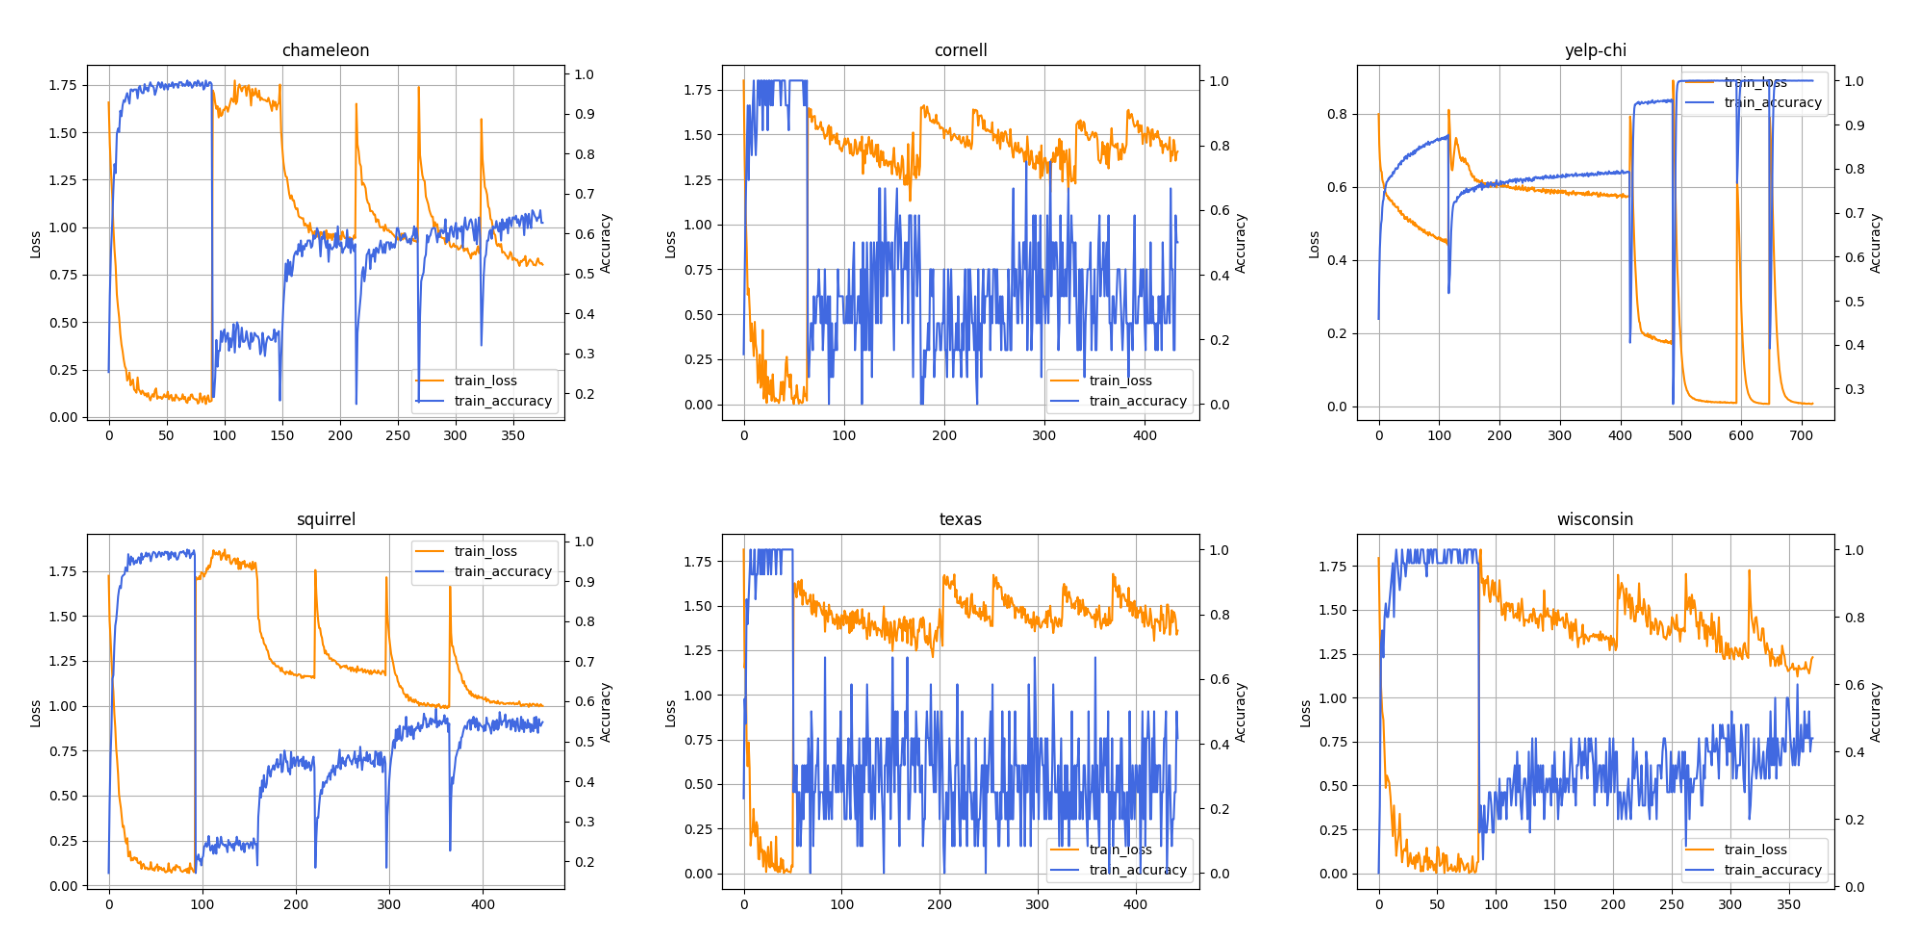

imgs/train_Composite_2.png


<Figure size 640x480 with 0 Axes>

In [ ]:
# 3.17 数据分析
import numpy as np
from utils import cal_change_ratio
import matplotlib.pyplot as plt 
import os
import matplotlib.image as mpimg

datasets = ['chameleon', 'cornell', 'yelp-chi', 'squirrel', 'texas', 'wisconsin']

tail = 2

for dataset_name in datasets:
    train_loss_list = np.load(f'utils_data/ourModel_{dataset_name}_{tail}/loss.npy')[:,0]
    train_accuracy_list = np.load(f'utils_data/ourModel_{dataset_name}_{tail}/metric.npy')
    
    fig = plt.figure()
    ax = fig.add_subplot(111) 
    ax.set_ylabel('Loss')
    lns1 = ax.plot(train_loss_list, label='train_loss', color='darkorange')
    
    ax2 = ax.twinx()
    lns2 = ax2.plot(train_accuracy_list, label='train_accuracy', color='royalblue')
    ax2.set_ylabel('Accuracy')
    
    lns = lns1 + lns2 
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0)
    ax.set_title(dataset_name)
    
    ax.grid()
    
    plt.savefig(f'imgs/train_{dataset_name}_{tail}.png')
    plt.close()


image_list = [f'train_{dataset}_{tail}.png' for dataset in datasets]

img_sample = plt.imread(os.path.join('imgs', image_list[0]))
(max_height, max_width, _) = img_sample.shape

images = [mpimg.imread(os.path.join('imgs', path)) for path in image_list]
plt.figure(figsize=(max_width * 3 / 100, max_height * 2 / 100))

for i, image in enumerate(images):
    plt.subplot(2, 3, i+1)
    plt.imshow(image)
    plt.axis('off') 
    
plt.tight_layout()

plt.show()
plt.savefig(f'imgs/train_Composite_{tail}.png')
print(f'imgs/train_Composite_{tail}.png')



In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

easy_vote_record_1 = np.load('utils_data/easy_vote_record_1.npy')
hard_vote_record_1 = np.load('utils_data/hard_vote_record_1.npy')
easy_vote_record_2 = np.load('utils_data/easy_vote_record_2.npy')
hard_vote_record_2 = np.load('utils_data/hard_vote_record_2.npy')
easy_vote_record_3 = np.load('utils_data/easy_vote_record_3.npy')
hard_vote_record_3 = np.load('utils_data/hard_vote_record_3.npy')

bar = 3

hard_indices_1 = np.where((hard_vote_record_1 - easy_vote_record_1)>bar)[0]
easy_indices_1 = np.where((hard_vote_record_1 - easy_vote_record_1)<=bar)[0]
hard_indices_2 = np.where((hard_vote_record_2 - easy_vote_record_2)>bar)[0]
easy_indices_2 = np.where((hard_vote_record_2 - easy_vote_record_2)<=bar)[0]
hard_indices_3 = np.where((hard_vote_record_3 - easy_vote_record_3)>bar)[0]
easy_indices_3 = np.where((hard_vote_record_3 - easy_vote_record_3)<=bar)[0]

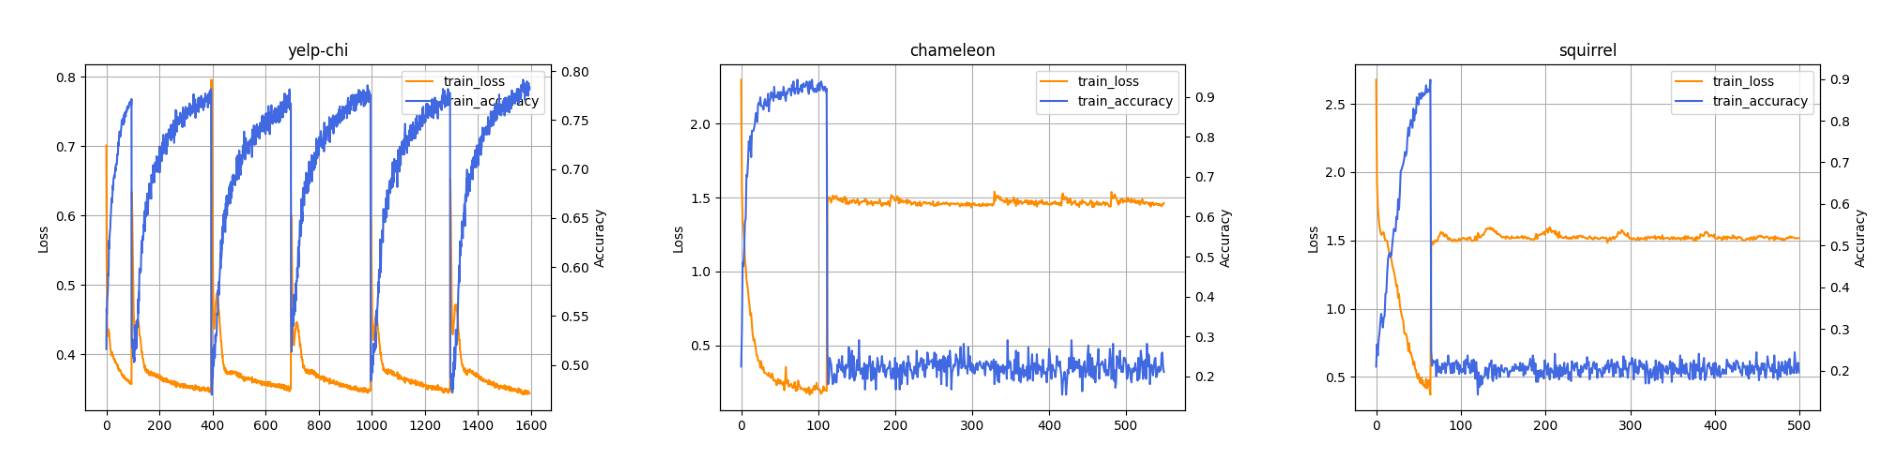

imgs/train_Composite_0_A_B_random_GCN_warmUp.png


<Figure size 640x480 with 0 Axes>

In [ ]:
# 3.30 数据分析
import numpy as np
from utils import cal_change_ratio
import matplotlib.pyplot as plt 
import os
import matplotlib.image as mpimg

datasets = ['yelp-chi', 'chameleon', 'squirrel']

# tail = '0_A_B_random_mlp_warmUp'
tail = '0_A_B_random_GCN_warmUp'

for dataset_name in datasets:
    train_loss_list = np.load(f'utils_data/ourModel_{dataset_name}_{tail}/loss.npy')[:,0]
    train_accuracy_list = np.load(f'utils_data/ourModel_{dataset_name}_{tail}/metric.npy')
    
    fig = plt.figure()
    ax = fig.add_subplot(111) 
    ax.set_ylabel('Loss')
    lns1 = ax.plot(train_loss_list, label='train_loss', color='darkorange')
    
    ax2 = ax.twinx()
    lns2 = ax2.plot(train_accuracy_list, label='train_accuracy', color='royalblue')
    ax2.set_ylabel('Accuracy')
    
    lns = lns1 + lns2 
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0)
    ax.set_title(dataset_name)
    
    ax.grid()
    
    plt.savefig(f'imgs/train_{dataset_name}_{tail}.png')
    plt.close()


image_list = [f'train_{dataset}_{tail}.png' for dataset in datasets]

img_sample = plt.imread(os.path.join('imgs', image_list[0]))
(max_height, max_width, _) = img_sample.shape

images = [mpimg.imread(os.path.join('imgs', path)) for path in image_list]
plt.figure(figsize=(max_width * 3 / 100, max_height / 100))

for i, image in enumerate(images):
    plt.subplot(1, 3, i+1)
    plt.imshow(image)
    plt.axis('off') 
    
plt.tight_layout()

plt.show()
plt.savefig(f'imgs/train_Composite_{tail}.png')
print(f'imgs/train_Composite_{tail}.png')



In [ ]:
import torch
import pandas as pd
import graphistry
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
import networkx as nx
from utils import load_dataset, preprocessing

dataset = load_dataset('cornell')
graph = preprocessing(dataset)


In [ ]:
import torch
import pandas as pd
import graphistry
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
import networkx as nx
from utils import load_dataset, preprocessing
import plotly.graph_objects as go
import numpy as np
from plotly.offline import plot

dataset = load_dataset('cornell')
graph = preprocessing(dataset)

G = nx.Graph()
G.add_nodes_from(range(graph.num_nodes))
G.add_edges_from(graph.edge_index.T.numpy())

pos = nx.spring_layout(G, seed=42)

color = graph.y.numpy()

pos_array = np.array(list(pos.values()))
x_nodes = pos_array[:, 0]  
y_nodes = pos_array[:, 1] 

x_edges = []
y_edges = []
for edge in G.edges():
    x_edges.extend([pos[edge[0]][0], pos[edge[1]][0], None])
    y_edges.extend([pos[edge[0]][1], pos[edge[1]][1], None])

edge_trace = go.Scatter(x=x_edges, y=y_edges, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')


node_trace = go.Scatter(x=x_nodes, y=y_nodes, mode='markers', hoverinfo='text', text=[f'class {i}' for i in color],
                        marker=dict(color=color, colorscale='Rainbow', showscale=True, line_width=0.5))

fig = go.Figure(data=[edge_trace, node_trace], layout=go.Layout(showlegend=False, hovermode='closest',
                                                                 margin=dict(b=0, l=0, r=0, t=0),
                                                                 xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                                                                 yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()

In [ ]:
# 4.4 数据可视化
from utils import load_dataset, preprocessing, DataLoader_folder
import torch 
import numpy as np
import os 
import networkx as nx 
import plotly.graph_objects as go
from plotly.offline import plot

# 观察不同代节点划分
def visulization_split(graph_name, state_dic, save_name):
    print(save_name)
    graph = preprocessing(load_dataset(graph_name))
    G = nx.Graph()
    G.add_nodes_from(range(graph.num_nodes))
    G.add_edges_from(graph.edge_index.T.numpy())

    pos = nx.spring_layout(G, seed=42)

    color = torch.zeros_like(state_dic['train_index'], dtype=int)
    color[state_dic['train_index_A']] = 0
    color[state_dic['train_index_B']] = 1
    color[state_dic['val_index']] = 2
    color[state_dic['test_index']] = 3
    color[state_dic['unlabeled_index']] = 4
    # TODO:考虑pseudolabel, 完善text

    pos_array = np.array(list(pos.values()))
    x_nodes = pos_array[:, 0]  
    y_nodes = pos_array[:, 1] 

    x_edges = []
    y_edges = []
    for edge in G.edges():
        x_edges.extend([pos[edge[0]][0], pos[edge[1]][0], None])
        y_edges.extend([pos[edge[0]][1], pos[edge[1]][1], None])

    edge_trace = go.Scatter(x=x_edges, y=y_edges, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')

    node_trace = go.Scatter(x=x_nodes, y=y_nodes, mode='markers', hoverinfo='text', text=[f'prediction {state_dic["edge_pseudolabel"][n]}<br>confidence {state_dic["label_confidence"][n]}<br>label {i}' for n, i in enumerate(graph.y.numpy())],
                            marker=dict(color=color, colorscale='Rainbow', showscale=True, line_width=1))

    fig = go.Figure(data=[edge_trace, node_trace], layout=go.Layout(showlegend=False, hovermode='closest',
                                                                    margin=dict(b=0, l=0, r=0, t=0),
                                                                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                                                                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

    fig.write_html(os.path.join('htmls', f'{save_name}.html'))
    fig.write_image(os.path.join('imgs', f'{save_name}.png'))

In [ ]:
dataset_name_list = ["yelp-chi", "chameleon", "squirrel", "texas", "cornell", "wisconsin"]
dataset_name_list = list(reversed(dataset_name_list))
for name in dataset_name_list:
    print(name)
    loader = DataLoader_folder(os.path.join('utils_data', f'ourModel_{name}_0_A_B_random_soft'))
    state_record_list = loader.state_record_list
    [visulization_split(name, state,  f'{name}_{i}_random') for i, state in enumerate(state_record_list)]
    break

In [ ]:
# 可视化loss，分析哪里没下降
# 3.30 数据分析
import numpy as np
from utils import cal_change_ratio
import matplotlib.pyplot as plt 
import os
import matplotlib.image as mpimg

# datasets = ['yelp-chi', 'chameleon', 'squirrel']
datasets = ['texas']

# tail = '0_A_B_random_mlp_warmUp'
tail = '0_A_B_random_hard'

for dataset_name in datasets:
    train_loss_list = np.load(f'utils_data/ourModel_{dataset_name}_{tail}/loss.npy')[:,0]
    multilayer_loss_list = np.load(f'utils_data/ourModel_{dataset_name}_{tail}/muti_layer_loss_list.npy', allow_pickle=True)
    train_accuracy_list = np.load(f'utils_data/ourModel_{dataset_name}_{tail}/metric.npy')
    iteration_metric = np.load(f'utils_data/ourModel_{dataset_name}_{tail}/best_val_metric_list.npy')
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111) 
    ax.set_ylabel('Loss')
    lns1 = ax.plot(train_loss_list, label='train_loss', color='darkorange')
    
    ax2 = ax.twinx()
    lns2 = ax2.plot(train_accuracy_list, label='train_accuracy', color='royalblue')
    ax2.set_ylabel('Accuracy')
    
    lns = lns1 + lns2 
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0)
    ax.set_title(dataset_name)
    
    ax.grid()
    
    plt.show()
    
    plt.plot(np.arange(len(iteration_metric)), iteration_metric, '-o')
    plt.grid()


FileNotFoundError: [Errno 2] No such file or directory: 'utils_data/ourModel_texas_0_A_B_random_hard/loss.npy'

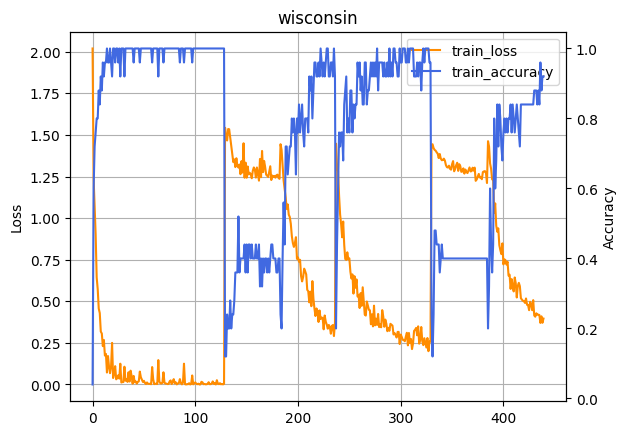

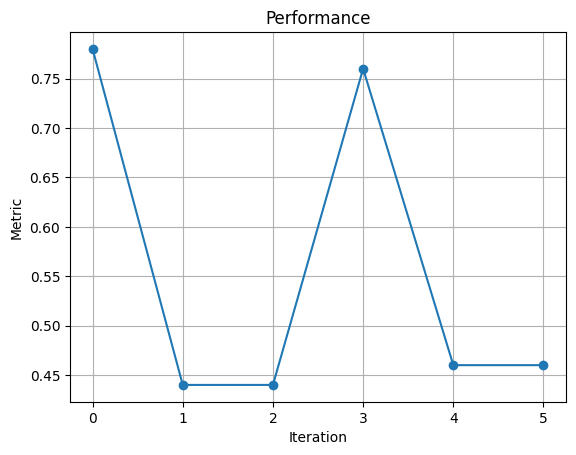

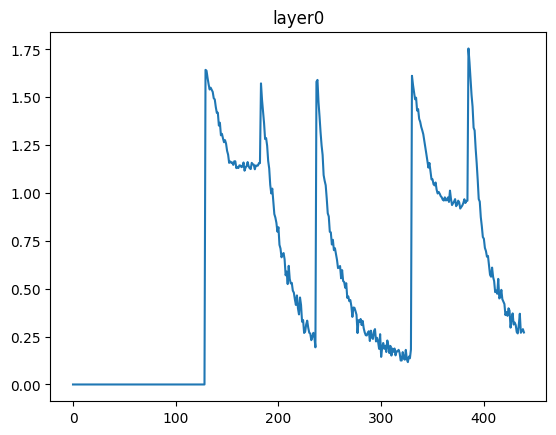

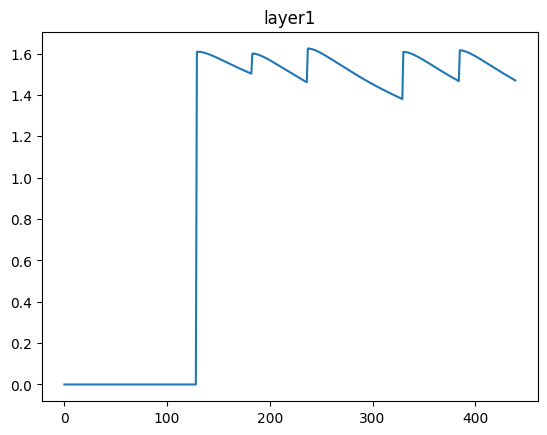

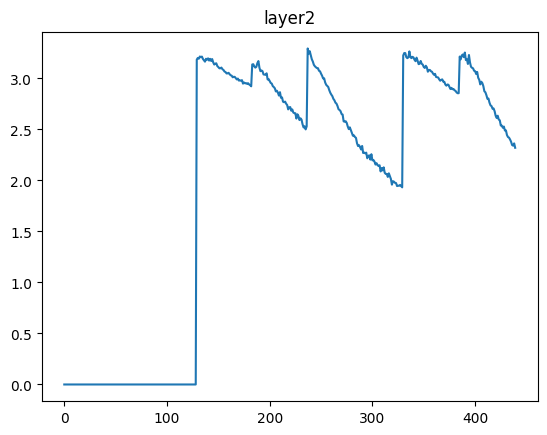

In [ ]:
# 可视化loss，分析哪里没下降
# 3.30 数据分析
import numpy as np
from utils import cal_change_ratio
import matplotlib.pyplot as plt 
import os
import matplotlib.image as mpimg

# datasets = ['yelp-chi', 'chameleon', 'squirrel']
datasets = ['wisconsin']

# tail = '0_A_B_random_mlp_warmUp'
tail = '0_A_B_random_soft'

for dataset_name in datasets:
    train_loss_list = np.load(f'utils_data/ourModel_{dataset_name}_{tail}/loss.npy')[:,0]
    multilayer_loss_list = np.load(f'utils_data/ourModel_{dataset_name}_{tail}/muti_layer_loss_list.npy', allow_pickle=True)
    train_accuracy_list = np.load(f'utils_data/ourModel_{dataset_name}_{tail}/metric.npy')
    iteration_metric = np.load(f'utils_data/ourModel_{dataset_name}_{tail}/best_val_metric_list.npy')
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111) 
    ax.set_ylabel('Loss')
    lns1 = ax.plot(train_loss_list, label='train_loss', color='darkorange')
    
    ax2 = ax.twinx()
    lns2 = ax2.plot(train_accuracy_list, label='train_accuracy', color='royalblue')
    ax2.set_ylabel('Accuracy')
    
    lns = lns1 + lns2 
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0)
    ax.set_title(dataset_name)
    
    ax.grid()
    
    plt.show()
    
    plt.plot(np.arange(len(iteration_metric)), iteration_metric, '-o')
    plt.xlabel('Iteration')
    plt.ylabel('Metric')
    plt.title('Performance')
    plt.grid()

    for i in range(len(multilayer_loss_list[0])):
        plt.figure()
        plt.plot(multilayer_loss_list[:,i])
        plt.title(f'layer{i}')

In [ ]:
import numpy as np 

cornell_hard = [0.6388888955116272, 0.5833333134651184, 0.5833333134651184, 0.5833333134651184, 0.5, 0.5]

In [ ]:
# 获取平均链接数量
from utils import load_dataset, preprocessing, DataLoader_folder
import numpy as np 
import os 
import torch 

name = 'texas'
graph = preprocessing(load_dataset(name))
loader = DataLoader_folder(os.path.join('utils_data', f'ourModel_{name}_0_A_B_random_soft'))
state_record_list = loader.state_record_list
neighbors = [graph.edge_index[1,:][graph.edge_index[0,:]==i].numpy() for i in range(len(graph.y))]
avg_n = np.mean([len(n) for n in neighbors])

for iteration in range(1,6):
    label_confidence = state_record_list[iteration]['label_confidence'].numpy()
    label_confidence = label_confidence[label_confidence!=1.]
    print(label_confidence.shape)
    print(np.mean(label_confidence))

(104,)
0.4324759
(104,)
0.38719314
(101,)
0.3976055
(99,)
0.4336099
(99,)
0.39725384


Text(0, 0.5, 'confidence')

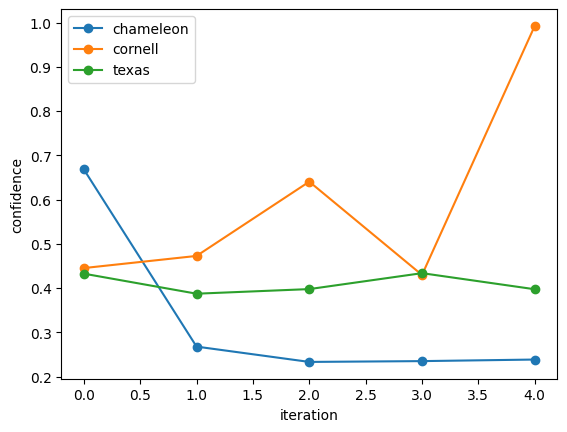

In [ ]:
# mean confidence 

chameleon_confidence = [0.66816473, 0.26763588, 0.2330224, 0.23485762, 0.23839314]
cornell_confidence = [0.4451293, 0.47254333, 0.64039, 0.42958137, 0.992329]
texas_confidence = [0.4324759, 0.38719314, 0.3976055, 0.4336099, 0.39725384]

plt.plot(chameleon_confidence, '-o', label='chameleon')
plt.plot(cornell_confidence, '-o', label='cornell')
plt.plot(texas_confidence, '-o', label='texas')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('confidence')


In [ ]:
for i in range(1,6):
    print(torch.mean((loader.state_record_list[i]['edge_pseudolabel']==graph.y)*1.))
    

tensor(0.6885)
tensor(0.6339)
tensor(0.6339)
tensor(0.6339)
tensor(0.4699)


In [ ]:
loader.best_val_metric_list

array([0.75     , 0.6111111, 0.6111111, 0.6111111, 0.6388889, 0.6111111])

In [ ]:
loader.state_record_list[0].keys()

dict_keys(['train_index', 'train_index_A', 'train_index_B', 'val_index', 'test_index', 'unlabeled_index', 'edge_pseudolabel', 'label_confidence', 'edge_threshold', 'node_threshold'])

In [ ]:
loader.best_val_metric_list

array([0.75     , 0.6111111, 0.6111111, 0.6111111, 0.6388889, 0.6111111])

In [ ]:
# 重点标记始终错误的节点和孤立节点

In [16]:
import numpy as np 
import pandas as pd 
import os 

root = 'res_record'
dataset_list=['yelp-chi', 'deezer-europe', 'cornell', 'texas', 'wisconsin', 'chameleon', 'squirrel']
model_list=['GCN', 'GIN', 'GraphSAGE', 'H2GCN', 'mlp', 'ourModel']
df = pd.DataFrame(columns=dataset_list, index=model_list)

for f in os.listdir(root):
    data = np.load(os.path.join(root, f))
    model_name = f.split('_')[0]
    dataset_name = f.split('_')[1]
    if 'acc' in f and 'squirrel' in f:
        print(f)
        print(data)
        # acc_list = np.array([np.max(r) if 'ourModel' in f else np.min(r) for r in data ])
        # df[dataset_name][model_name] = f'{100*acc_list.mean():.4g}±{100*acc_list.std():.3g}'
    
df

mlp_squirrel_acc.npy
[[0.21923077 0.27307692 0.26826924 0.27692309 0.28365386 0.26442307]
 [0.23076923 0.27403846 0.28557691 0.27403846 0.28365386 0.27692309]
 [0.22307692 0.25480768 0.25961539 0.2778846  0.2846154  0.25961539]
 [0.21923077 0.26826924 0.29615384 0.28557691 0.30673078 0.28749999]
 [0.21923077 0.28846154 0.29903847 0.2923077  0.29903847 0.29711539]]
GIN_squirrel_acc.npy
[[0.22403847 0.25576922 0.22211538 0.26346153 0.24038461 0.21923077]
 [0.25096154 0.29038462 0.22980769 0.28365386 0.30192307 0.26826924]
 [0.24423076 0.2846154  0.25288463 0.27403846 0.25096154 0.24807693]
 [0.21153846 0.27403846 0.28749999 0.25961539 0.24903846 0.26346153]
 [0.21730769 0.28942308 0.24230769 0.23653845 0.24134615 0.25096154]]
GCN_squirrel_acc.npy
[[0.23846154 0.25       0.23365384 0.27980769 0.27500001 0.25      ]
 [0.24711539 0.31057692 0.30673078 0.27307692 0.31538463 0.29903847]
 [0.2326923  0.28365386 0.22596154 0.23173077 0.27884614 0.25096154]
 [0.23846154 0.29326922 0.26538461 0.2

,yelp-chi,deezer-europe,cornell,texas,wisconsin,chameleon,squirrel
GCN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GraphSAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2GCN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mlp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ourModel,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_865881/1662278934.py:30: UserWarning:

Glyph 36845 (\N{CJK UNIFIED IDEOGRAPH-8FED}) missing from current font.

/tmp/ipykernel_865881/1662278934.py:30: UserWarning:

Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.

/tmp/ipykernel_865881/1662278934.py:30: UserWarning:

Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.

/scratch/yinghao/miniconda3/envs/graph_exp/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 36845 (\N{CJK UNIFIED IDEOGRAPH-8FED}) missing from current font.

/scratch/yinghao/miniconda3/envs/graph_exp/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.

/scratch/yinghao/miniconda3/envs/graph_exp/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.



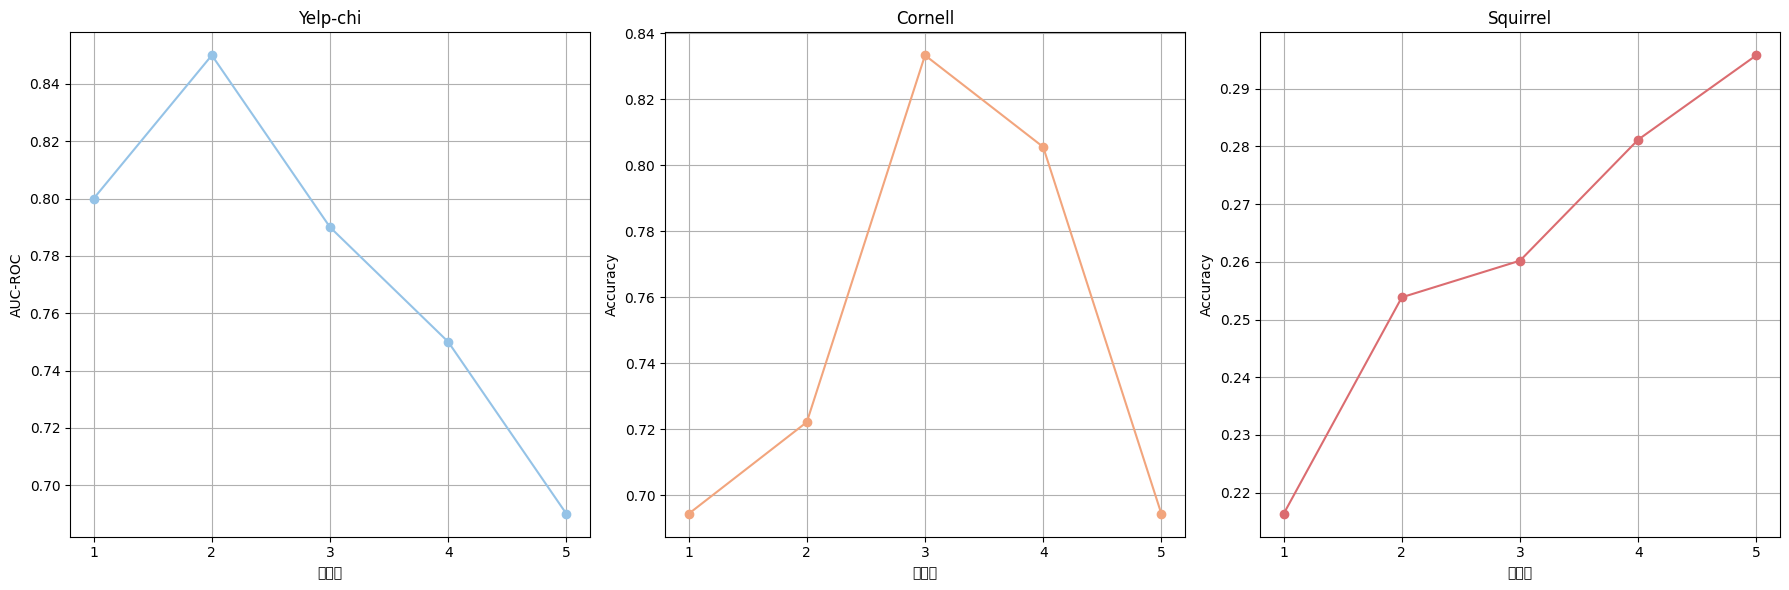

In [27]:
# Plotting each dataset separately in a horizontal layout

plt.figure(figsize=(18, 6))
x = np.arange(1,6).astype(str)
# Yelp CHI
plt.subplot(1, 3, 1)
plt.plot(x, yelp_chi, label='Yelp-chi', color=colors[0], marker='o')
plt.xlabel('迭代数')
plt.ylabel('AUC-ROC')
plt.title('Yelp-chi')
plt.grid(True)

# Cornell
plt.subplot(1, 3, 2)
plt.plot(x, cornell, label='Cornell', color=colors[1], marker='o')
plt.xlabel('迭代数')
plt.ylabel('Accuracy')
plt.title('Cornell')
plt.grid(True)

# Squirrel
plt.subplot(1, 3, 3)
plt.plot(x, squirrel, label='Squirrel', color=colors[2], marker='o')
plt.xlabel('迭代数')
plt.ylabel('Accuracy')
plt.title('Squirrel')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plots
# plt.savefig('/mnt/data/horizontal_plots.png')

plt.show()


In [25]:
np.arange(1,6)

array([1, 2, 3, 4, 5])